#  Río de la Plata tides analysis

This was a task proposed by the physics department to electronics engineering students. The aim of this analysis is to estimate the time it takes for a tide to travel from one port to another.

The main idea of the notebook is to visualize and analyze data about the tides of Río de la Plata. We intend to study the propagation of waves generated by the gravitational attraction exerted by the moon and the sun on the water.

We are going to work with tidal data in the ports of San Fernando and Buenos Aires. The dataset is located in: /work/tides_SF-BA.csv  and contains temporal series.

So, it is convenient to work with pandas:

In [ ]:
import pandas as pd

df = pd.read_csv('/work/tides_SF-BA.csv')

### Exploring the data

In [ ]:
df.head()

,Time,H_SF,H_BA
0,2011-01-01 00:00:00,NaN,92.0
1,2011-01-01 01:00:00,NaN,110.0
2,2011-01-01 02:00:00,NaN,124.0
3,2011-01-01 03:00:00,NaN,132.0
4,2011-01-01 04:00:00,NaN,136.0


In [ ]:
df.index

RangeIndex(start=0, stop=35064, step=1)

The file has the water heighs in the port of San Fernando (column **H_SF**) and in the port of Buenos Aires (column **H_BA**) measured in centimeters. It has a time data per hour (column **Time**) for 4 years. In the first records something very frequent with this type of files is observed: it has a lot of missing data. 

The dataframe index give us information about it's structure. In this case, it's showing the number of the row in the file. But an index can contribute with more relevant information to our problem, so we will use the column **Time** as a new index.

In [ ]:
df = pd.read_csv('/work/tides_SF-BA.csv',index_col=['Time'],parse_dates=True)

parse_dates = True  -->  interpreted as a timestap.

In [ ]:
df.head()

,H_SF,H_BA
Time,,
2011-01-01 00:00:00,NaN,92.0
2011-01-01 01:00:00,NaN,110.0
2011-01-01 02:00:00,NaN,124.0
2011-01-01 03:00:00,NaN,132.0
2011-01-01 04:00:00,NaN,136.0


In [ ]:
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=35064, freq=None)

Having a temporal index is importart because the versatility it provides.

In [ ]:
df['1-18-2013 7:00':'1-18-2013 14:00']

,H_SF,H_BA
Time,,
2013-01-18 07:00:00,137.0,122.0
2013-01-18 08:00:00,125.0,116.0
2013-01-18 09:00:00,118.0,122.0
2013-01-18 10:00:00,122.0,129.0
2013-01-18 11:00:00,131.0,130.0
2013-01-18 12:00:00,130.0,129.0
2013-01-18 13:00:00,124.0,119.0
2013-01-18 14:00:00,116.0,113.0


### Tidal waves in the Río de la Plata

<AxesSubplot:xlabel='Time'>

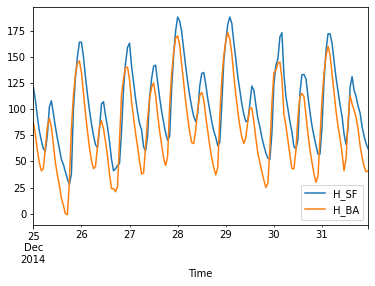

In [ ]:
df['12-25-2014':].plot()

Here are three interesting phenomena:    

. There are 14 peaks in 7 days, this corresponds to the semi-diurnal frequency of the tides. Every little more than 12 hours we have a cycle with high and low tide. Two cycles per day.  

. On the other hand, it is seen that the tides in San Fernando are delayed with respect to those of Buenos Aires. This is due to the fact that the tidal waves come from the Atlantic Ocean and propagate through the estuary of the Río de la Plata, passing first through Buenos Aires and then arriving, with delay, in San Fernando. Under certain conditions this tidal wave can reach the city of Rosario, although it is attenuating on its journey from the Atlantic.    

. Finally, there is a marked difference between the height recorded in San Fernando and that of Buenos Aires. This is because the two scales, from which the data are recorded, have zeros that are not leveled.

**We are going to study the propagation of this tidal wave that is generated by the gravitational attraction exerted by the moon and the sun on the water. We are going to use a Fourier transform that allows us to study the predominant frequencies in the series of heights. The tides will be clearly seen because these astronomical effects are regular and have invariant frequencies.**

### Winds and storm waves in the Río de la Plata

If we look at a graph a little more extended in time, we will see that the heights not only fluctuate with the semi-diurnal tides but that the meteorological component (mainly winds, which generate storm waves) modifies the heights in a very considerable way.The following command generates a graph between October 15, 2014 and December 15 of the same year.

<AxesSubplot:xlabel='Time'>

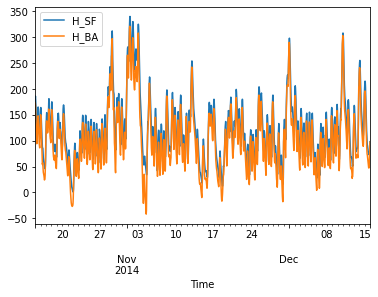

In [ ]:
df['10-15-2014':'12-15-2014'].plot()

In this graph, it can be seen how a sudestate in early November raised the level of the estuary more than one meter for almost three days. The two photos that follow are precisely from that south-east.

![](/work/photos/sudestada1.jpg)

![](/work/photos/sudestada2.jpg)

Just as the southeast wind pushes the water into the estuary and generates floods, the winds from the north or west also drive displacement of the water from the estuary, in this case generating downspouts.

![](/work/photos/bajante1.jpg)

![](/work/photos/bajante2.jpg)

The Fourier transform will not be very useful to see these storm waves. Since they lack regularity, they will not appear clearly in the frequency spectrum.

#  Analysis using Fourier transform

The Fourier transform decomposes a signal into a sum of sines and cosines (sinusoids) with different frequencies and amplitudes. 

![](https://raw.githubusercontent.com/python-unsam/Programacion_en_Python_UNSAM/master/Notas/08_Fechas_Carpetas_y_Pandas/cuadrada.gif)

The transform gives, for each frequency, a complex number ```a + bi``` that can be thought of as a vector ```(a, b)``` in the plane. The real part will multiply a cosine with the indicated frequency and the imaginary part a sine with the same frequency. The magnitude (or amplitude, or power) of the signal at that frequency corresponds to the length of the vector ```(a, b)```. 

![](/work/photos/vectorial.jpg)

The phase (or displacement of the maximum with respect to the origin of the coordinates), corresponds to the angle that this vector ```(a,b)``` forms with the semi-axis of the positive reals.

### Module preparation

In [ ]:
from scipy import signal # to process signals
import numpy as np
import matplotlib.pyplot as plt

Let's select the two series as numpy vectors (with the ```to_numpy()``` method).

In [ ]:
start = '2014-01'
fin = '2014-06'
heighs_sf = df[start:fin]['H_SF'].to_numpy()
heighs_ba = df[start:fin]['H_BA'].to_numpy()


First let's define a function that calculates the Fourier transform for hourly data and considering days as the unit of frequency (we discard half of the transform coefficients because the data are real and not complex).

In [ ]:
def calcular_fft(y, freq_sampleo = 24.0):
    '''y must be a vector with real numbers representing data from a time series.
     freq_sampleo is set to consider 24 data per unit (because our dataset takes 1 sample per hour).
     Returns two vectors, one of frequencies and another with the transformed itself.
     The transform contains the complex values that correspond to respective frequencies.'''
    N = len(y)
    freq = np.fft.fftfreq(N, d = 1/freq_sampleo)[:N//2]
    tran = (np.fft.fft(y)/N)[:N//2]
    return freq, tran


To be able to analyze a wave by Fourier's transform, the wave must be periodic. It may happen that this is not the case and it has a linear trend, in that case we could use the function ```scipy.signal.detrend()```.
In our case we will assume that the mean tide remained stable throughout the study period, so we do not have to do additional processing.

### Power and angle spectrum for San Fernando

First we calculate the transform of the heights of San Fernando.

In [ ]:
freq_sf, fft_sf = calcular_fft(heighs_sf)
# fft_sf contains complex numbers

The power (or amplitude) for each frequency is calculated as the norm of the corresponding complex number (for the frequency ```freq_sf [i]```, the power is ```abs(fft_sf [i])```).

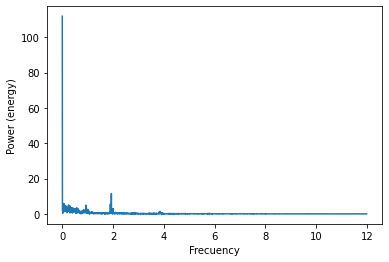

In [ ]:
plt.plot(freq_sf, np.abs(fft_sf))
plt.xlabel("Frecuency")
plt.ylabel("Power (energy)")
plt.show()


Two peaks can be seen, one at frequency 0 (constant related to scale zero) and another peak close to frequency 2 (semi-diurnal frequency) which is related to the tidal wave. The peak in the first position effectively corresponds to frequency 0 and its amplitude is:

In [ ]:
print(freq_sf[0]) #freq

0.0


In [ ]:
np.abs(fft_sf[0]) #amplitude

111.83701657458563

From this we can say that the heights of the river in San Fernando during this period oscillate around **111.8 cm** in height.

To precisely analyze the semi-diurnal peak we can use ```find_peaks``` that provides ```scipy.signal``` to avoid doing it by eye. We are going to ask for those peaks that have at least some difference from their surroundings (prominence), a good value for this is **8**.

In [ ]:
print(signal.find_peaks(np.abs(fft_sf), prominence = 8))

(array([350]), {'prominences': array([11.4554514]), 'left_bases': array([307]), 'right_bases': array([2109])})


This response tells us that there is a peak with the requested prominence (at least 8), which has a magnitude of 11.45 and corresponds to position 350 of the vector.

In [ ]:
freq_sf[350]

1.9337016574585635

The frequency related to that position is close to two, as we have already observed in the graph (two cycles per day). We can distinguish the peaks by adding a red dot and taking a closer look at the area of interest:

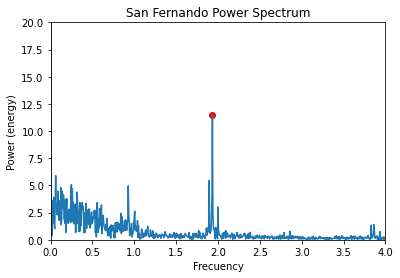

In [ ]:
plt.plot(freq_sf, np.abs(fft_sf))
plt.xlabel("Frecuency")
plt.ylabel("Power (energy)")
plt.xlim(0,4)
plt.ylim(0,20)
plt.title("San Fernando Power Spectrum")
# use only last peak
peak_sf = signal.find_peaks(np.abs(fft_sf), prominence = 8)[0][-1]

plt.scatter(freq_sf[peak_sf], np.abs(fft_sf)[peak_sf], facecolor = 'r')
plt.show()


These graphs allow us to interpret that if we decompose the height curve in San Fernando as the _sum of sinusoids_, the sinusoid with frequency **1.93** has a considerably striking magnitude. It is no coincidence that this is a distinguished point: it is about the frequency of the **lunar tides**.

#### **Phases** Analysis: 
***If we know the phase of these components in two different ports, we can estimate the time it takes for the tide to move from one to the other***.
We can use ```np.angle()``` with the peak.



In [ ]:
ang_sf = np.angle(fft_sf)[peak_sf]
print(ang_sf)

1.4848748699802203


We obtain a value close to $ \frac{pi}{2} $. Let us remember that $ {2pi} $ corresponds to a phase shift of a complete cycle of the curve. As our study curve has a daily frequency slightly less than 2 _(freq_sf [350] ~ 1.93)_, $ {2pi} $ corresponds to $ \frac{24}{1.93} $ hours ~ 12.44 hours. Therefore the phase obtained with ```ang_sf[350]``` corresponds to a delay of:

In [ ]:
ang_sf * 24 / (2 * np.pi * freq_sf[350])

2.933133034483339

### Power and angle spectrum for Buenos Aires

Let's quickly repeat the procedure and analyze the differences.

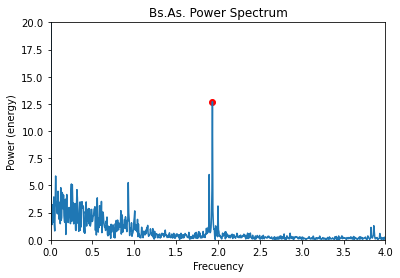

In [ ]:
freq_ba, fft_ba = calcular_fft(heighs_ba)
plt.plot(freq_ba, np.abs(fft_ba))
plt.xlabel("Frecuency")
plt.ylabel("Power (energy)")
plt.xlim(0,4)
plt.ylim(0,20)

peak_ba = signal.find_peaks(np.abs(fft_ba), prominence = 8)[0][-1]

plt.scatter(freq_ba[pico_ba], np.abs(fft_ba)[peak_ba], facecolor='r')
plt.title("Bs.As. Power Spectrum")
plt.show()


If we look for the constant around which the tides oscillate according to the level of the port of Buenos Aires, we obtain:

In [ ]:
np.abs(fft_ba[0])

88.20718232044199

If we observe that the power spectrum we see that the peaks in both ports are extremely similar.

In [ ]:
print(signal.find_peaks(np.abs(fft_ba), prominence=8))

(array([350]), {'prominences': array([12.67228046]), 'left_bases': array([279]), 'right_bases': array([1000])})


The tides of Buenos Aires have a **maximum amplitude** component at **frequency 1.93** (same as San Fernando) and with a **magnitude** of 12.67 (**quite similar** to the corresponding magnitude in San Fernando). 

It remains to study the phase of the ```df_ba``` data curve at this frequency to be able to accurately determine the phase difference between both ports for tidal waves. First we calculate the angle of the corresponding component and then we convert it to hours using the factor ```ang2h```:

In [ ]:
ang_ba = np.angle(fft_ba)[peak_ba]
print(ang_ba)
freq = freq_ba[peak_ba]
ang2h = 24 / (2*np.pi*freq) # factor
print(ang_ba * ang2h)

1.9635101108937492
3.878600470813556


Therefore, the tidal wave delay can be calculated using: 

In [ ]:
print((ang_ba - ang_sf) * ang2h)

0.9454674363302169


**About 1 hour delay from BA to San fernando**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=489a9fca-268e-4600-816f-adda708f4f03' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>